<a href="https://colab.research.google.com/github/JurijJusel/Image/blob/t7-dir-reader/apple_banana_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import numpy as np

import csv
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
# connect to dataset in google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Image preprocessing

In [80]:
apple_banana_train_path = '/content/drive/MyDrive/Colab Notebooks/dataset/train'

In [77]:
image_url = []
folder_name=[]
for file_path, folders, files in os.walk(apple_banana_train_path):
  for file in files:
      full_path = os.path.join(file_path, file)
      image_url.append(full_path)
      direct = file_path.split('/')[7:]
      folder_name.append('/'.join(direct))


In [ ]:
folder_name_df = pd.DataFrame(folder_name, columns=['name'])
img_path_df = pd.DataFrame(image_url,columns=['image_path'] )
df = pd.concat([folder_name_df, img_path_df], axis=1)
df.to_csv('/content/drive/MyDrive/Colab Notebooks/apple_banana.csv', index=False)

In [84]:
apple_banana_df = '/content/drive/MyDrive/Colab Notebooks/apple_banana.csv'

In [85]:
read_apple_banana_df = pd.read_csv(apple_banana_df)
read_apple_banana_df.info()
read_apple_banana_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        143 non-null    object
 1   image_path  143 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


,name,image_path
0,apple,/content/drive/MyDrive/Colab Notebooks/dataset...
1,apple,/content/drive/MyDrive/Colab Notebooks/dataset...
2,apple,/content/drive/MyDrive/Colab Notebooks/dataset...
3,apple,/content/drive/MyDrive/Colab Notebooks/dataset...
4,apple,/content/drive/MyDrive/Colab Notebooks/dataset...


In [87]:
read_apple_banana_df['image_path']


0      /content/drive/MyDrive/Colab Notebooks/dataset...
1      /content/drive/MyDrive/Colab Notebooks/dataset...
2      /content/drive/MyDrive/Colab Notebooks/dataset...
3      /content/drive/MyDrive/Colab Notebooks/dataset...
4      /content/drive/MyDrive/Colab Notebooks/dataset...
                             ...                        
138    /content/drive/MyDrive/Colab Notebooks/dataset...
139    /content/drive/MyDrive/Colab Notebooks/dataset...
140    /content/drive/MyDrive/Colab Notebooks/dataset...
141    /content/drive/MyDrive/Colab Notebooks/dataset...
142    /content/drive/MyDrive/Colab Notebooks/dataset...
Name: image_path, Length: 143, dtype: object

In [ ]:
for line in range(len(read_apple_banana_df)):
    line_path=read_apple_banana_df['image_path']


In [ ]:
image_lst=[]
folder_name=[]
for line in line_path:
    # print(line)
    img_path = cv2.imread(line)
    direct = line.split('/')[7:8]
    folder_name.append('/'.join(direct))
    img = plt.imread(line)
    gray_img = cv2.cvtColor(img_path, cv2.COLOR_RGB2GRAY)
    img_resized = cv2.resize(gray_img, (122,122))
    img_array = np.array(img_resized)
    image_gray_lst=[item for sublist in img_array for item in sublist]
    image_lst.append(image_gray_lst)


In [ ]:
img_data_df = pd.DataFrame(image_lst)
name_df = pd.DataFrame(folder_name, columns=['image_name'])
apple_banana_df_grey = pd.concat([img_data_df, name_df], axis=1)
apple_banana_df_grey.to_csv('/content/drive/MyDrive/Colab Notebooks/apple_banana_grey_df.csv', index=False)
       

# Data preprocessing

In [60]:
apple_banana_grey_df = '/content/drive/MyDrive/Colab Notebooks/apple_banana_grey_df.csv'
read_df = pd.read_csv(apple_banana_grey_df)
read_df

,0,1,2,3,4,5,6,7,8,9,...,14875,14876,14877,14878,14879,14880,14881,14882,14883,image_name
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,apple
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,apple
2,-122,-121,-123,126,-126,-120,-118,-117,-118,-121,...,-18,-29,-37,-42,-43,-33,-51,-41,-44,apple
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,apple
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,apple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,banana
139,-76,-68,-61,-42,-32,-43,-54,-53,-79,-82,...,-102,-2,-1,-1,-1,-1,-1,-1,-1,banana
140,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,banana
141,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,banana


In [61]:
read_df['image_name']

0       apple
1       apple
2       apple
3       apple
4       apple
        ...  
138    banana
139    banana
140    banana
141    banana
142    banana
Name: image_name, Length: 143, dtype: object

In [62]:
#making instance of labelencoder()
# Encode target labels ('image_name') with value
le = LabelEncoder()
encoded = le.fit_transform(read_df['image_name'])
encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [63]:
# removing the original column ''image_name'' from read_df
read_df.drop('image_name', axis=1, inplace=True)

In [64]:
# printing Dataframe without 'image_name' column
read_df

,0,1,2,3,4,5,6,7,8,9,...,14874,14875,14876,14877,14878,14879,14880,14881,14882,14883
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,-122,-121,-123,126,-126,-120,-118,-117,-118,-121,...,-37,-18,-29,-37,-42,-43,-33,-51,-41,-44
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
139,-76,-68,-61,-42,-32,-43,-54,-53,-79,-82,...,-115,-102,-2,-1,-1,-1,-1,-1,-1,-1
140,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
141,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [65]:
encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [66]:
# Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(read_df, encoded, test_size=0.33, random_state=42)

In [116]:
X_train
# X_train.shape

,0,1,2,3,4,5,6,7,8,9,...,14874,14875,14876,14877,14878,14879,14880,14881,14882,14883
25,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
23,8,8,8,9,9,9,9,9,9,9,...,-113,123,-121,-115,-106,-112,-104,-107,-110,-115
115,33,34,36,35,39,45,51,48,39,38,...,77,77,75,75,74,73,72,71,68,68
67,-6,-5,-6,-5,-4,-4,-6,-66,59,-45,...,13,16,12,17,6,45,50,40,24,16
44,35,35,35,35,35,35,35,35,35,35,...,-69,-68,-69,-69,-68,-70,-70,-70,-70,-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-2,-1,-1,-1,-1,-1,-1,-1,-1,-1
92,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [115]:
# X_test
X_test.shape

(48, 14884)

In [114]:
y_train


array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1])

In [70]:
y_test

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0])

# Model predictions


In [71]:
# all parameters not specified are set to their defaults
logisticRegr=LogisticRegression()

In [72]:
# Model is learning the relationship between digits (x_train) and labels (y_train)
logisticRegr.fit(X_train,y_train)

LogisticRegression()

In [74]:
# predict labels for new data (new images),predictions on entire X_test data
predictions = logisticRegr.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0])

In [117]:
# method to get accuracy of model
accuracy_score = logisticRegr.score(X_test, y_test)
accuracy_score

0.7916666666666666

In [86]:
cm = confusion_matrix(y_test, predictions)
cm

array([[21,  4],
       [ 6, 17]])

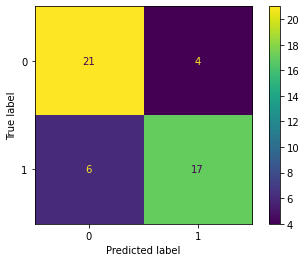

In [118]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
# True Negative (Top-Left Quadrant)
# False Positive (Top-Right Quadrant)
# False Negative (Bottom-Left Quadrant)
# True Positive (Bottom-Right Quadrant)

In [92]:
from sklearn.svm import SVC

In [125]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = SVC(random_state=0)

In [126]:
clf.fit(X_train, y_train)

SVC(random_state=0)

In [127]:
predictions = logisticRegr.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0])

In [128]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
cm

array([[21,  4],
       [ 6, 17]])

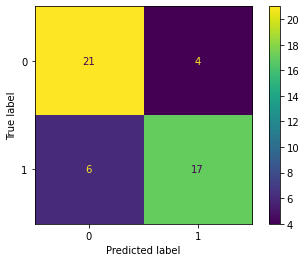

In [129]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()


In [130]:
from sklearn import metrics

precision = metrics.precision_score(y_test, predictions)
precision


0.8095238095238095